In [1]:
import shnitsel as sh
import shnitsel.xarray
import matplotlib.pyplot as plt

from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [2]:
homologs = sh.open_frames('/tmp/homologs.nc')
homologs

<xarray.Dataset> Size: 340MB
Dimensions:    (state: 3, frame: 53332, direction: 3, statecomb: 3, atom: 6,
                trajid_: 255)
Coordinates:
  * state      (state) int64 24B 1 2 3
  * atom       (atom) int64 48B 0 1 2 3 4 5
  * direction  (direction) <U1 12B 'x' 'y' 'z'
  * trajid_    (trajid_) int32 1kB 2 3 6 13 17 19 20 ... 938 944 947 954 961 969
    atNames    (frame, atom) <U1 1MB ...
  * statecomb  (statecomb) object 24B MultiIndex
  * from       (statecomb) int64 24B 1 1 2
  * to         (statecomb) int64 24B 2 3 3
  * frame      (frame) object 427kB MultiIndex
  * cmpnd      (frame) <U3 640kB 'I01' 'I01' 'I01' 'I01' ... 'A03' 'A03' 'A03'
  * trajid     (frame) int64 427kB 2 2 2 2 2 2 2 ... 316 316 316 316 316 316 316
  * time       (frame) float64 427kB 0.0 0.5 1.0 1.5 2.0 ... 76.5 77.0 77.5 78.0
Data variables: (12/13)
    energy     (state, frame) float64 1MB ...
    dip_perm   (state, direction, frame) float64 4MB ...
    dip_trans  (statecomb, direction, frame) float64 4MB ...
    sdiag      (frame) int64 427kB ...
    astate     (frame) int64 427kB ...
    forces     (state, atom, direction, frame) float64 23MB ...
    ...         ...
    nacs       (statecomb, atom, direction, frame) float64 23MB ...
    atXYZ      (atom, direction, frame) float64 8MB ...
    max_ts     (trajid_, frame) float64 109MB ...
    completed  (trajid_, frame) float32 54MB ...
    nsteps     (trajid_, frame) float64 109MB ...
    e_kin      (frame) float64 427kB ...
Attributes:
    delta_t:  0.5

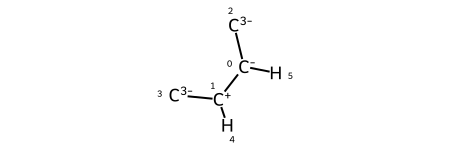

In [3]:
homologs.atXYZ.sel(cmpnd='A03').isel(frame=0).sh.to_mol(to2D=False)

In [4]:
dih = homologs.atXYZ.sh.dihedral(3, 1, 0, 2, deg=True)
dih

<xarray.DataArray 'dihedral' (frame: 53332)> Size: 427kB
array([  2.19650568,   2.18585872,   2.34416698, ..., 157.76520892,
       160.6599355 , 163.70932658], shape=(53332,))
Coordinates:
  * frame    (frame) object 427kB MultiIndex
  * cmpnd    (frame) <U3 640kB 'I01' 'I01' 'I01' 'I01' ... 'A03' 'A03' 'A03'
  * trajid   (frame) int64 427kB 2 2 2 2 2 2 2 2 ... 316 316 316 316 316 316 316
  * time     (frame) float64 427kB 0.0 0.5 1.0 1.5 2.0 ... 76.5 77.0 77.5 78.0
Attributes:
    long_name:  $\varphi_{3,1,0,2}$

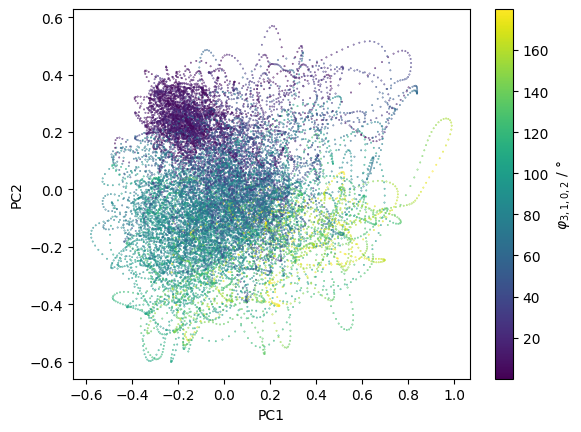

In [5]:
pca_A03 = homologs.atXYZ.sel(cmpnd='A03').sh.pairwise_dists_pca()
plt.scatter(pca_A03[:, 0], pca_A03[:, 1], c=dih.sel(cmpnd='A03'), s=0.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label=dih.attrs['long_name'] + ' / °')

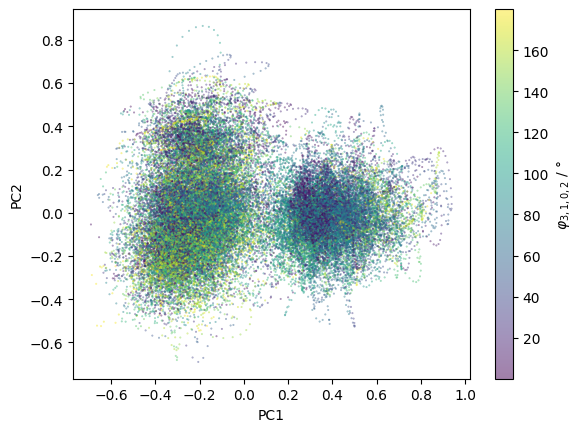

In [6]:
pca = homologs.atXYZ.sh.pairwise_dists_pca()
pca['dih'] = homologs.atXYZ.sh.dihedral(3, 1, 0, 2, deg=True)
plt.scatter(pca[:, 0], pca[:, 1], c=pca['dih'], s=0.2, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label=dih.attrs['long_name'] + ' / °')

sweeping clock from -30°
swept to -60°
sweeping anti from 30°
swept to 50°
Less than 4 directions found, procedure repeated with another binning.
sweeping clock from -30°
swept to -60°
sweeping anti from 30°
swept to 50°
sweeping clock from -60°
Less than 4 directions found, procedure repeated with another binning.
sweeping clock from -25°
swept to -55°
sweeping anti from 25°
swept to 45°
sweeping clock from -55°
sweeping anti from 45°


(array([[-0.7597645 , -0.74165041, -0.72353632, ...,  0.99730193,
          1.01541601,  1.0335301 ],
        [-0.7597645 , -0.74165041, -0.72353632, ...,  0.99730193,
          1.01541601,  1.0335301 ],
        [-0.7597645 , -0.74165041, -0.72353632, ...,  0.99730193,
          1.01541601,  1.0335301 ],
        ...,
        [-0.7597645 , -0.74165041, -0.72353632, ...,  0.99730193,
          1.01541601,  1.0335301 ],
        [-0.7597645 , -0.74165041, -0.72353632, ...,  0.99730193,
          1.01541601,  1.0335301 ],
        [-0.7597645 , -0.74165041, -0.72353632, ...,  0.99730193,
          1.01541601,  1.0335301 ]], shape=(100, 100)),
 array([[-0.75959635, -0.75959635, -0.75959635, ..., -0.75959635,
         -0.75959635, -0.75959635],
        [-0.74231721, -0.74231721, -0.74231721, ..., -0.74231721,
         -0.74231721, -0.74231721],
        [-0.72503808, -0.72503808, -0.72503808, ..., -0.72503808,
         -0.72503808, -0.72503808],
        ...,
        [ 0.91647938,  0.91647938,  

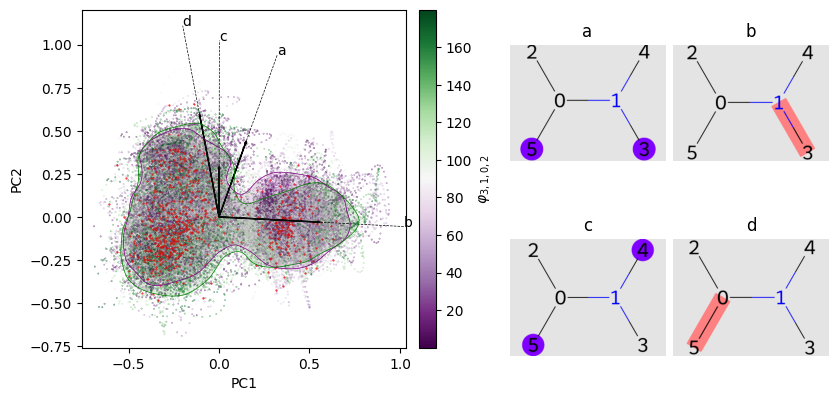

In [7]:
sh.plot.biplot_kde(homologs, 3, 1, 0, 2, scatter_color='geo')

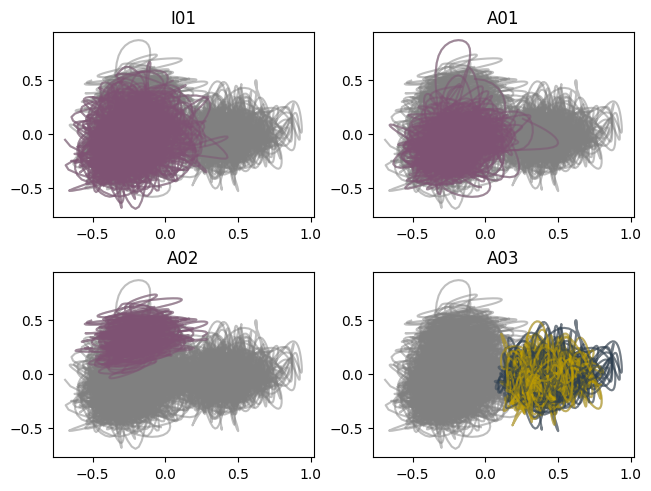

In [33]:
fig, axs = plt.subplot_mosaic([['I01', 'A01'],['A02', 'A03']], layout='constrained')

for name, ax in axs.items():
    ax.set_title(name)
    for (cmpnd, trajid), traj in pca.sh.mgroupby(['cmpnd', 'trajid']):
        ax.plot(traj[:,0], traj[:,1], c='gray', alpha=0.5)

for (cmpnd, trajid), traj in pca.sh.mgroupby(['cmpnd', 'trajid']):
    if cmpnd != 'A03':
        c = '#7E5273'
    elif traj['dih'].isel(frame=-1) < 80:
        c = '#2c3e50'
    elif traj['dih'].isel(frame=-1) > 100:
        c = '#C4A000'
    axs[cmpnd].plot(traj[:,0], traj[:,1], c=c, alpha=0.5)

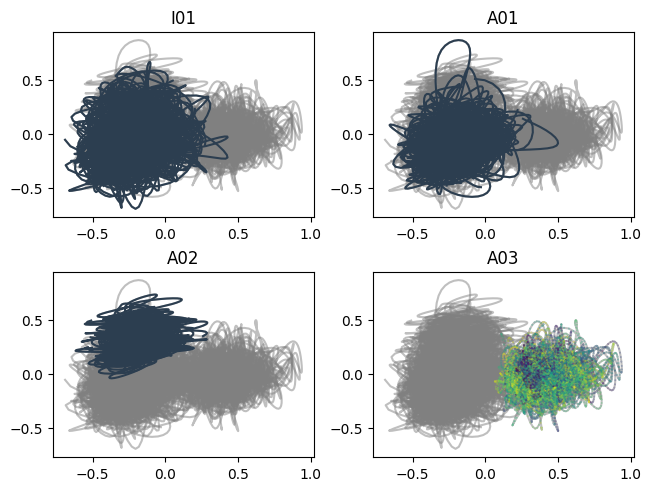

In [30]:
pca = homologs.atXYZ.sh.pairwise_dists_pca()
pca['dih'] = homologs.atXYZ.sh.dihedral(3, 1, 0, 2, deg=True)


fig, axs = plt.subplot_mosaic([['I01', 'A01'],['A02', 'A03']], layout='constrained')

for name, ax in axs.items():
    ax.set_title(name)
    for (cmpnd, trajid), traj in pca.sh.mgroupby(['cmpnd', 'trajid']):
        ax.plot(traj[:,0], traj[:,1], c='gray', alpha=0.5)

for (cmpnd, trajid), traj in pca.sh.mgroupby(['cmpnd', 'trajid']):
    if cmpnd != 'A03':
        axs[cmpnd].plot(traj[:,0], traj[:,1], c='#2c3e50')
    else:
        axs[cmpnd].scatter(traj[:,0], traj[:,1], c=traj['dih'], alpha=0.5, s=0.1, zorder=10)


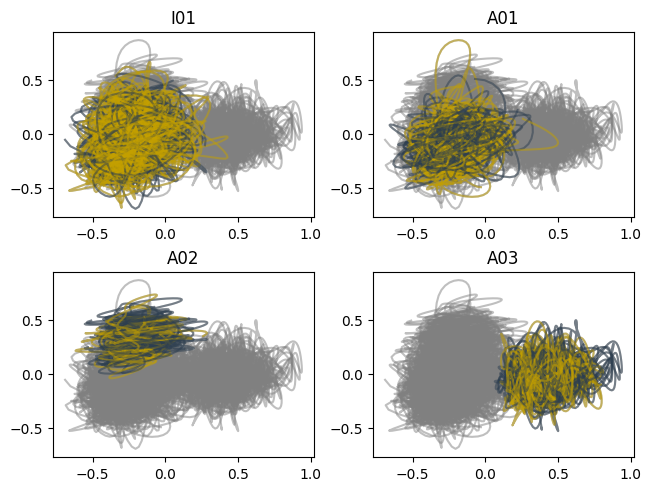

In [28]:
pca = homologs.atXYZ.sh.pairwise_dists_pca()
pca['dih'] = homologs.atXYZ.sh.dihedral(3, 1, 0, 2, deg=True)


fig, axs = plt.subplot_mosaic([['I01', 'A01'],['A02', 'A03']], layout='constrained')

for name, ax in axs.items():
    ax.set_title(name)
    for (cmpnd, trajid), traj in pca.sh.mgroupby(['cmpnd', 'trajid']):
        ax.plot(traj[:,0], traj[:,1], c='gray', alpha=0.5)

for (cmpnd, trajid), traj in pca.sh.mgroupby(['cmpnd', 'trajid']):
    if traj['dih'].isel(frame=-1) < 80:
        c = '#2c3e50'
    elif traj['dih'].isel(frame=-1) > 100:
        c = '#C4A000'
    axs[cmpnd].plot(traj[:,0], traj[:,1], c=c, alpha=0.5)